In [12]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt

In [3]:
def generateStepRandomWalk(pos, action_prob):
    s = pos
    pos += rd.choices([-1, 1], action_prob)[0]
    if pos == 3:
        return (s, 1, pos) #S, R, S'
    return (s, 0, pos)

[0, 0.11485459126951507, 0.35256446181107504, 0.49815335309662717, 0.735520206091, 0.8932966726702938, 0]


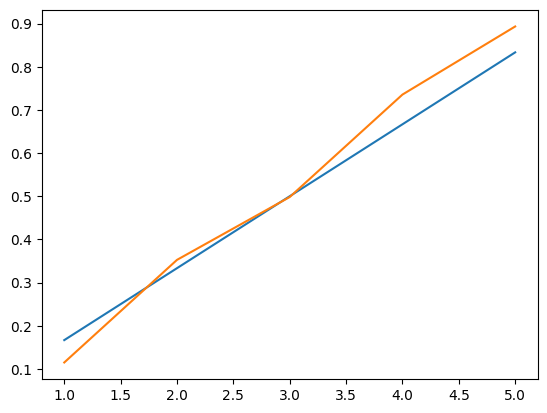

In [28]:
state_val = [0 for _ in range(7)]
def tdZero(state_val, a, episodes, gamma):
    for _ in range(episodes):
        s = 0
        while True:
            olds, r, s, = generateStepRandomWalk(s, [0.5, 0.5])
            state_val[olds+3] += a*(r + gamma*state_val[s+3] - state_val[olds+3])
            if s in [-3, 3]:
                break

tdZero(state_val, 0.1, 100, 1)
print(state_val)
plt.plot([1,2,3,4,5], [1/6, 2/6, 3/6, 4/6, 5/6])
plt.plot([1,2,3,4,5],state_val[1:-1])

[0, 0.4097062353374653, 0.600298723172146, 0.7520616240768725, 0.8886901264904028, 0.9264193718380008, 0]


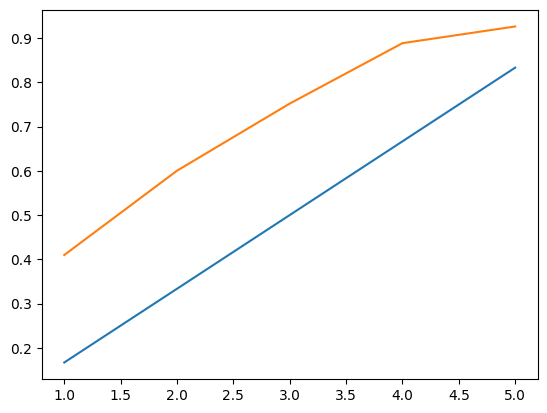

In [27]:
state_val = [0 for _ in range(7)]
def constaMC(state_val, a, episodes):
    for _ in range(episodes):
        episode = []
        olds, r, s = 0, 0, 0
        while s not in [-3, 3]:
            olds, r, s = generateStepRandomWalk(s, [0.5, 0.5])
            episode.insert(0, (olds, r, s))
        gt = 0
        for olds, r, s in episode:
            gt += r
            state_val[olds+3] += a*(gt - state_val[olds+3])

constaMC(state_val, 0.1, 100)
print(state_val)
plt.plot([1,2,3,4,5], [1/6, 2/6, 3/6, 4/6, 5/6])
plt.plot([1,2,3,4,5],state_val[1:-1])

In [6]:
print(state_val)
print([1/6, 2/6, 3/6, 4/6, 5/6])

[0, 0.17283407824693514, 0.18547156825146482, 0.2216158228737345, 0.5402395014370149, 0.822981596422659, 0]
[0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333334]


In [4]:
import numpy as np
doentes = np.array([15.9, 21, 17.7, 22.3, 21.8, 20.8, 18.7, 17.5, 22.5, 28.8])
sadias = np.array([15.2, 9.3, 25.8, 13.8, 18.4, 18.8, 19.4, 15.2, 9.3, 9.6, 16.1, 16.5, 10.1, 16.9, 17.3])

In [1]:
import numpy as np

def w_std(x, y):
    return (np.mean(x) - np.mean(y)) / np.sqrt(
        (((len(x) - 1) * (np.std(x, ddof=1) ** 2) + (len(y) - 1) * (np.std(y, ddof=1) ** 2)) / (len(x) + len(y) - 2)) *
        ((1 / len(x)) + (1 / len(y)))
    )

# Dados
x = [15.9, 21.0, 17.7, 22.3, 21.8, 20.8, 18.7, 17.5, 22.5, 28.8]
y = [15.2, 9.3, 25.8, 13.8, 18.4, 18.8, 19.4, 15.2, 9.3, 9.6, 16.1, 16.5, 10.1, 16.9, 17.3]

# Resultado
t_stat = w_std(x, y)
print(f'Estatística t: {t_stat:.4f}')

Estatística t: 3.0476


In [20]:
np.pow(doentes.std(ddof=1), 2)

np.float64(13.222222222222225)

In [21]:
(9*13.22+14*20.79)/23

17.827826086956524

In [22]:
(20.7-15.44)/np.sqrt((1/10+1/15)*17.83)

np.float64(3.051305541497198)

In [23]:
from scipy.stats import f

In [32]:
f.ppf(0.025, 9, 14)

np.float64(0.2632997660331528)